In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls "/content/drive/MyDrive/Colab Notebooks/IE 7275 Workspace/Project - DM/cleaned_data_migraine.csv"

'/content/drive/MyDrive/Colab Notebooks/IE 7275 Workspace/Project - DM/cleaned_data_migraine.csv'


In [12]:
mg_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IE 7275 Workspace/Project - DM/cleaned_data_migraine.csv")
mg_df.head(5)

,Unnamed: 0,Age,Duration,Frequency,Location,Character,Intensity,Vomit,Visual,Sensory,Dysphasia,Vertigo,Tinnitus,Hypoacusis,Visual_defect,DPF,Type
0,0,30,1,5,1,1,2,0,1,2,0,0,0,0,0,0,5
1,1,50,3,5,1,1,3,1,2,1,0,1,0,0,0,0,5
2,2,53,2,1,1,1,2,1,2,0,0,0,0,0,0,0,5
3,3,45,3,5,1,1,3,0,2,2,0,1,0,0,0,0,5
4,4,53,1,1,1,1,2,0,4,0,0,0,0,0,0,1,5


In [13]:
## Feature Importance
X = mg_df[mg_df.columns.difference(["Type"])]
y = mg_df['Type']

In [14]:
# Split dataset into training set and test set
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Decision Tree Model

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=28)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy 
clf_acc=metrics.accuracy_score(y_test, y_pred)

clf_acc

0.9747899159663865

In [40]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5  0  0  0  0  1  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  1  3  0  0  0]
 [ 0  0  0  0  5  0  0]
 [ 0  0  0  0  0 78  0]
 [ 0  1  0  0  0  0  7]]


In [43]:
# Create the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5
           2       0.93      1.00      0.96        13
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         5
           5       0.99      1.00      0.99        78
           6       1.00      0.88      0.93         8

    accuracy                           0.97       119
   macro avg       0.96      0.92      0.94       119
weighted avg       0.98      0.97      0.97       119



In [16]:
y_pred

array([5, 5, 6, 5, 5, 5, 5, 5, 5, 0, 6, 5, 4, 5, 3, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 2, 1, 5, 5, 0, 5, 1, 5, 5, 0, 5, 5, 5, 2, 5, 2, 5, 2, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 0, 4, 5, 5, 5, 6, 6, 2, 5, 5, 5, 5, 5,
       2, 5, 5, 2, 5, 5, 1, 5, 2, 2, 5, 5, 2, 1, 5, 5, 5, 6, 5, 5, 1, 5,
       5, 1, 5, 6, 5, 2, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5,
       3, 3, 6, 2, 5, 5, 5, 5, 4])

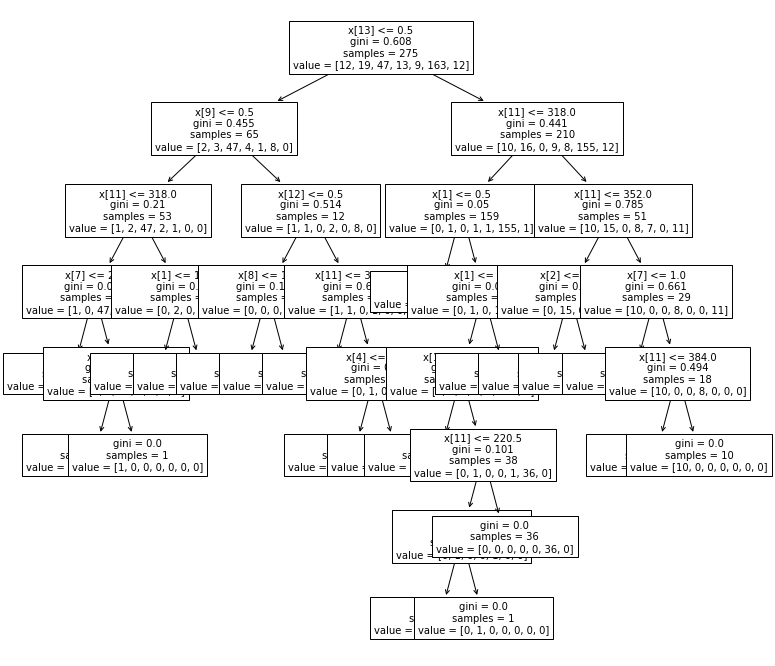

In [17]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(clf, fontsize=10, ax=ax)
plt.show()

In [18]:
n_classes = len(clf.classes_)
n_samples = mg_df.shape[0]
value = clf.tree_.value

gini = 0
for feature, threshold, impurity, samples in zip(clf.tree_.feature, clf.tree_.threshold, clf.tree_.impurity, clf.tree_.n_node_samples):
    if feature < 0:
        continue
    left = clf.tree_.children_left[feature]
    right = clf.tree_.children_right[feature]
    n_left = clf.tree_.n_node_samples[left]
    n_right = clf.tree_.n_node_samples[right]
    weight_left = n_left / samples
    weight_right = n_right / samples
    gini += impurity * (samples / n_samples) * (1.0 - (weight_left * (1 - value[left][:,0]/samples) ** 2 - weight_right * (1 - value[right][:,0]/samples) ** 2))

print("Gini index: ", gini)

Gini index:  [0.91668579]


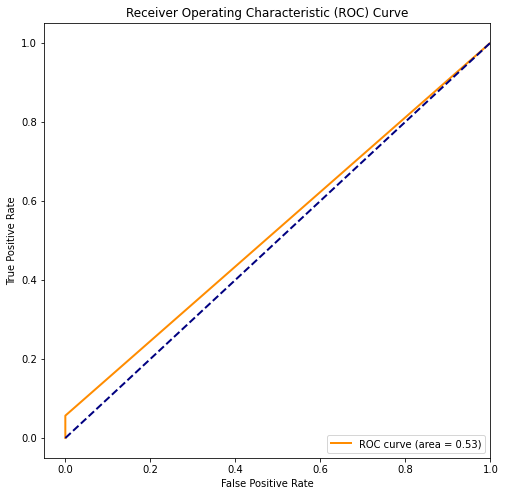

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = clf.predict_proba(X_test)

tpr, fpr, thresholds = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
y_score = clf.predict_proba(X_test)

In [21]:
y_score[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rnb=RandomForestClassifier(random_state=28)
rnb=rnb.fit(X_train,y_train)
rnb_pred=rnb.predict(X_test)
rnb_acc=metrics.accuracy_score(y_test,rnb_pred)

rnb_acc

0.957983193277311

In [53]:
# Create the classification report
report = classification_report(y_test, rnb_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5
           2       0.93      1.00      0.96        13
           3       1.00      0.50      0.67         4
           4       1.00      0.60      0.75         5
           5       0.96      1.00      0.98        78
           6       1.00      1.00      1.00         8

    accuracy                           0.96       119
   macro avg       0.96      0.85      0.88       119
weighted avg       0.96      0.96      0.95       119



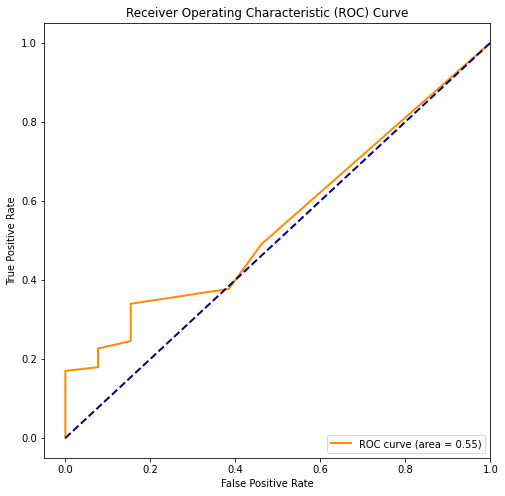

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = rnb.predict_proba(X_test)

tpr, fpr, thresholds = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
gnb=GaussianNB()
gnb=gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
gnb_acc=metrics.accuracy_score(y_test, gnb_pred)

gnb_acc

0.957983193277311

In [55]:
# Create the classification report
report = classification_report(y_test, gnb_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.71      1.00      0.83         5
           2       0.93      1.00      0.96        13
           3       0.67      0.50      0.57         4
           4       0.83      1.00      0.91         5
           5       1.00      0.99      0.99        78
           6       1.00      1.00      1.00         8

    accuracy                           0.96       119
   macro avg       0.88      0.88      0.87       119
weighted avg       0.96      0.96      0.96       119



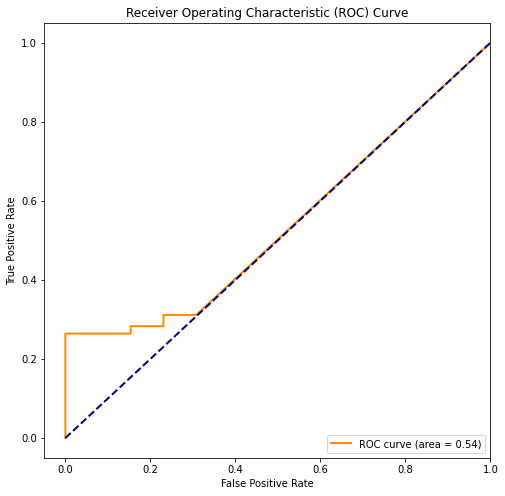

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = gnb.predict_proba(X_test)

tpr, fpr, thresholds = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
svm=SVC()
svm=svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
svm_acc= metrics.accuracy_score(y_test,svm_pred)

svm_acc

0.7647058823529411

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lgr=LogisticRegression()
lgr=lgr.fit(X_train,y_train)
lgr_pred=lgr.predict(X_test)
lgr_acc=metrics.accuracy_score(y_test,lgr_pred)

lgr_acc

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8067226890756303

Accuracy of all Models

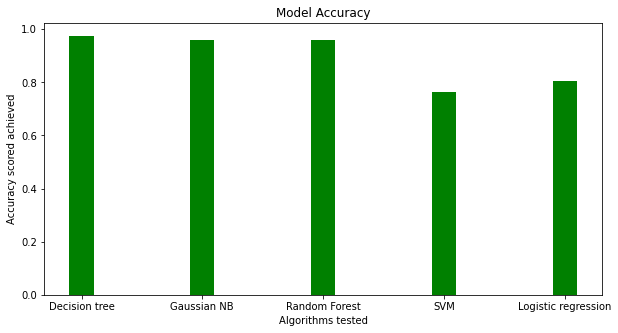

In [27]:
import numpy as np
import matplotlib.pyplot as plt
 
  
data = {'Decision tree':clf_acc, 'Gaussian NB':gnb_acc, 'Random Forest':rnb_acc,
        'SVM':svm_acc,'Logistic regression':lgr_acc}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, values, color ='green',
        width = 0.2)
 
plt.xlabel("Algorithms tested")
plt.ylabel("Accuracy scored achieved")
plt.title("Model Accuracy")
plt.show()

Neural Network

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=16))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
3/3 [==============================] - 1s 22ms/step - loss: -104.5183 - accuracy: 0.0582
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: -455.6088 - accuracy: 0.0691
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: -817.9829 - accuracy: 0.0691
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: -1234.8875 - accuracy: 0.0691
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: -1746.8856 - accuracy: 0.0691
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: -2363.6233 - accuracy: 0.0691
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: -3089.1399 - accuracy: 0.0691
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: -4018.9551 - accuracy: 0.0691
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: -5086.9160 - accuracy: 0.0691
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: -6382.5063 -